# Intro

In [173]:
#Read in libraries
import pandas as pd
import swifter

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [174]:
#Set style for matplotlib
plt.style.use('ggplot')

In [175]:
#Set options for pandas
pd.options.display.max_columns =500

pd.set_option('display.max_rows', 120)


In [176]:
#Set path to listings data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Data\03_Processed'

#Set list of date columns to parse
dates = ['calendar_last_scraped', 'first_review', 'host_since', 'last_review']

#Read in file
listings = pd.read_csv(path + '/01_16_2020_Listings_Post_EDA.csv',index_col=0, parse_dates=dates)

#Ordinal variables to convert to category
ordinals = ['review_scores_accuracy', 'review_scores_checkin','review_scores_cleanliness', 
            'review_scores_communication','review_scores_location','review_scores_rating',
            'review_scores_value','room_type','zipcode']

#Convert 
listings[ordinals] = listings[ordinals].astype('category')

## Preview Data

In [177]:
listings.head(1)

,accommodates,amenities,availability_30,availability_365,bathrooms,bed_type,bedrooms,beds,chlc,chlc_private_rooms,chlc_shared_rooms,calendar_last_scraped,calendar_updated,cancellation_policy,city,cleaning_fee,description,extra_people,first_review,guests_included,host_about,host_id,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_name,host_neighbourhood,host_response_rate,host_response_time,host_since,host_verifications,house_rules,id,instant_bookable,is_location_exact,last_review,latitude,longitude,market,maximum_maximum_nights,name,neighborhood_overview,neighbourhood_cleansed,number_of_reviews,number_of_reviews_ltm,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,scrape_id,security_deposit,space,summary,transit,zipcode,weekly_price,monthly_price
0,3,TV Cable TV Internet Wifi Kitchen Pets liv...,0,77,1.0,Real Bed,1.0,2.0,1,0.0,0.0,2019-04-03,1 week ago,moderate,San Francisco,100.0,New update: the house next door is under const...,25.0,2009-07-23,2,We are a family with 2 boys born in 2009 and 2...,1169,True,True,1.0,"San Francisco, California, United States",Holly,Duboce Triangle,100.0,within an hour,2008-07-31,email phone facebook reviews kba,* No Pets - even visiting guests for a short t...,958,True,True,2019-03-16,37.76931,-122.43386,San Francisco,30.0,"Bright, Modern Garden Unit - 1BR/1B",*Quiet cul de sac in friendly neighborhood *St...,Western Addition,183,51.0,170.0,Apartment,False,False,True,10.0,10.0,10.0,10.0,10.0,97.0,10.0,1.55,Entire home/apt,2.019040e+13,100.0,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,*Public Transportation is 1/2 block away. *Ce...,94117.0,1120.0,4200.0


In [178]:
#Print Shape
print('Listings shape: ', listings.shape)

#Check data types
listings.dtypes

Listings shape:  (88771, 68)


accommodates                                 int64
amenities                                   object
availability_30                              int64
availability_365                             int64
bathrooms                                  float64
bed_type                                    object
bedrooms                                   float64
beds                                       float64
chlc                                         int64
chlc_private_rooms                         float64
chlc_shared_rooms                          float64
calendar_last_scraped               datetime64[ns]
calendar_updated                            object
cancellation_policy                         object
city                                        object
cleaning_fee                               float64
description                                 object
extra_people                               float64
first_review                        datetime64[ns]
guests_included                

# Removing irrelevant features

In [179]:
#Removing columns that do not pertain to price
to_drop = ['calendar_last_scraped','calendar_updated', 'description','first_review','host_about','host_id',
          'host_listings_count','host_location','host_name', 'host_neighbourhood','house_rules','host_since','name',
          'neighborhood_overview', 'scrape_id','weekly_price','monthly_price', 'id','longitude', 'latitude',
          'space', 'summary', 'transit']

#Remove to_drop cols
listings.drop(columns=to_drop, inplace = True)
print('Current shape of listings: ', listings.shape)

Current shape of listings:  (88771, 45)


In [180]:
listings.head(1)


,accommodates,amenities,availability_30,availability_365,bathrooms,bed_type,bedrooms,beds,chlc,chlc_private_rooms,chlc_shared_rooms,cancellation_policy,city,cleaning_fee,extra_people,guests_included,host_identity_verified,host_is_superhost,host_response_rate,host_response_time,host_verifications,instant_bookable,is_location_exact,last_review,market,maximum_maximum_nights,neighbourhood_cleansed,number_of_reviews,number_of_reviews_ltm,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,security_deposit,zipcode
0,3,TV Cable TV Internet Wifi Kitchen Pets liv...,0,77,1.0,Real Bed,1.0,2.0,1,0.0,0.0,moderate,San Francisco,100.0,25.0,2,True,True,100.0,within an hour,email phone facebook reviews kba,True,True,2019-03-16,San Francisco,30.0,Western Addition,183,51.0,170.0,Apartment,False,False,True,10.0,10.0,10.0,10.0,10.0,97.0,10.0,1.55,Entire home/apt,100.0,94117.0


In [181]:
listings.dtypes

accommodates                                 int64
amenities                                   object
availability_30                              int64
availability_365                             int64
bathrooms                                  float64
bed_type                                    object
bedrooms                                   float64
beds                                       float64
chlc                                         int64
chlc_private_rooms                         float64
chlc_shared_rooms                          float64
cancellation_policy                         object
city                                        object
cleaning_fee                               float64
extra_people                               float64
guests_included                              int64
host_identity_verified                        bool
host_is_superhost                             bool
host_response_rate                         float64
host_response_time             

# Feature Engineering

## Transform numeric columns

C:\Users\kishe\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


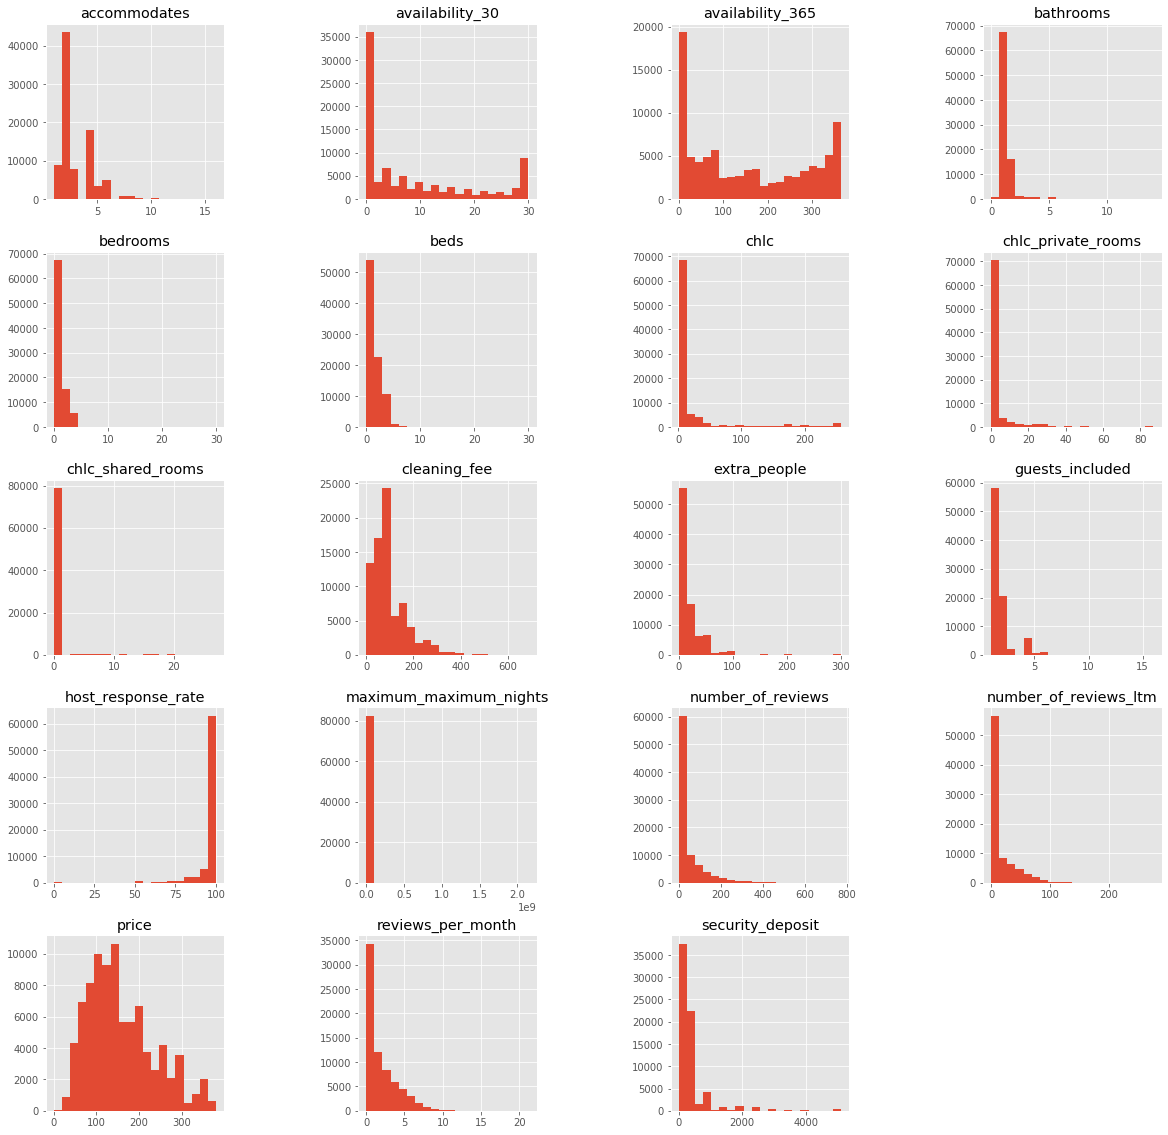

In [182]:
#Subset data to visualize distributions of numeric variables
numerics = listings.select_dtypes(exclude=['category','bool','object','datetime64'])

fig, ax = plt.subplots(figsize = (20,20))
numerics.hist(ax = ax, bins = 20)
fig.subplots_adjust(wspace=.75);
#chlc stands for calculated host listings count

In [183]:
listings.dtypes

accommodates                                 int64
amenities                                   object
availability_30                              int64
availability_365                             int64
bathrooms                                  float64
bed_type                                    object
bedrooms                                   float64
beds                                       float64
chlc                                         int64
chlc_private_rooms                         float64
chlc_shared_rooms                          float64
cancellation_policy                         object
city                                        object
cleaning_fee                               float64
extra_people                               float64
guests_included                              int64
host_identity_verified                        bool
host_is_superhost                             bool
host_response_rate                         float64
host_response_time             

## Adding new features

In [184]:
#Convert amenities into a count of amenities offered by airbnb
listings['total_amenities']= listings['amenities'].str.count(' ') + 1

#Check
listings[['total_amenities', 'amenities']].head(5)

,total_amenities,amenities
0,75,TV Cable TV Internet Wifi Kitchen Pets liv...
1,42,Internet Wifi Kitchen Heating Family/kid fri...
2,57,TV Internet Wifi Kitchen Free street parking...
3,50,TV Internet Wifi Kitchen Free street parking...
5,99,TV Cable TV Internet Wifi Kitchen Free par...


Split amenities and turn into catagorical variables

In [185]:
#Split amenities, host_verifications and encode as dummy variables
temp1 = listings['amenities'].str.get_dummies(sep=' ')
temp2 = listings['host_verifications'].str.get_dummies(sep=' ')

temp = pd.concat([temp1, temp2], axis=1)

#Remove column headers shorter than 3 characters in length
for col in temp.columns: 
    if len(col) < 3:
        temp.drop(columns= col, inplace=True)

#Combine listings and temp
listings = pd.concat([listings, temp], axis=1)

#Drop amenities column
listings.drop(columns = ['amenities','host_verifications'], inplace = True)

# Encode Dummy Variables

In [188]:
#Convert encode data type object
test=pd.get_dummies(listings.select_dtypes(include=['bool','object']))


#View Shape
print('Shape of data frame: ', test.shape)
listings.head(3)

Shape of data frame:  (88771, 95)


,accommodates,availability_30,availability_365,bathrooms,bed_type,bedrooms,beds,chlc,chlc_private_rooms,chlc_shared_rooms,cancellation_policy,city,cleaning_fee,extra_people,guests_included,host_identity_verified,host_is_superhost,host_response_rate,host_response_time,instant_bookable,is_location_exact,last_review,market,maximum_maximum_nights,neighbourhood_cleansed,number_of_reviews,number_of_reviews_ltm,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,security_deposit,zipcode,total_amenities,24-hour,Accessible-height,Air,Amazon,BBQ,Baby,Babysitter,Balcony,Bath,Bathroom,Bathtub,Beach,Beachfront,Bed,Bedroom,Bidet,Body,Breakfast,Building,Buzzer/wireless,Cable,Carbon,Cat(s),Ceiling,Central,Changing,Children’s,Cleaning,Coffee,Convection,Cooking,Crib,DVD,Day,Disabled,Dishes,Dishwasher,Dog(s),Doorman,Double,Dryer,Echo,Electric,Elevator,Espresso,Essentials,Ethernet,Exercise,Extra,Family/kid,Fax,Fire,Fireplace,Firm,First,Fixed,Flat,Formal,Free,Full,Game,Garden,Gas,Ground,Gym,HBO,Hair,Hammock,Handheld,Hangers,Heat,Heated,Heating,High,High-resolution,Host,Hot,Indoor,Internet,Iron,Jetted,Keypad,Kitchen,Kitchenette,Lake,Laptop,Lock,Lockbox,Long,Luggage,Memory,Microwave,Mini,Mobile,Mountain,Mudroom,Murphy,Netflix,Other,Outdoor,Outlet,Oven,Pack,Paid,Patio,Pets,Pillow-top,Play/travel,Pocket,Pool,Printer,Private,Projector,Rain,Refrigerator,Roll-in,Room-darkening,Safety,Self,Shampoo,Shared,Shower,Single,Ski-in/Ski-out,Smart,Smoke,Smoking,Soaking,Sound,Stair,Stand,Standing,Steam,Step-free,Stove,Suitable,Sun,Table,Tennis,Terrace,Toilet,Walk-in,Warming,Washer,Waterfront,Well-lit,Wheelchair,Wide,Wifi,Window,Wine,access,accessible,aid,air,allowed,alone,and,area,around,backyard,balcony,bars,basics,bath,bathroom,bed,bedroom,before,blankets,books,card,chair,charger,check-in,checkout,clearance,comforts,computer,conditioning,connection,console,cooler,corner,court,covers,crib,detector,dining,dinnerware,door,doorway,drawer,dropoff,dryer,en.hosting_amenity_49,en.hosting_amenity_50,enter,entrance,entryway,equipment,essentials,events,extinguisher,fan,fireplace,floor,floors,foam,for,fridge,friendly,front,gates,grab,greets,grill,guards,guest,guests,gym,hallway,hallways,head,hoist,home,hot,intercom,kettle,kit,kitchen,lamps,level,linens,live,living,lock,loungers,machine,maker,mattress,missing:,monitor,monoxide,off,oven,paper,parking,path,pet(s),pillows,pit,player,pool,premises,profiling,property,purifier,rack,recommendations,room,screen,seating,shades,shower,silverware,soap,space,spot,staff,stairs,stays,steam,steps,street,suite,system,table,term,this,toilet,towel,toys,translation,tub,valet,view,water,wifi,with,workspace,you,None,email,facebook,google,government_id,identity_manual,jumio,kba,manual_offline,manual_online,offline_government_id,phone,photographer,reviews,selfie,sent_id,weibo,work_email,zhima_selfie
0,3,0,77,1.0,Real Bed,1.0,2.0,1,0.0,0.0,moderate,San Francisco,100.0,25.0,2,True,True,100.0,within an hour,True,True,2019-03-16,San Francisco,30.0,Western Addition,183,51.0,170.0,Apartment,False,False,True,10.0,10.0,10.0,10.0,10.0,97.0,10.0,1.55,Entire home/apt,100.0,94117.0,75,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
1,5,0,0,1.0,Real Bed,2.0,3.0,1,

# Feature Selection